### Utilizando el feature de desglosar la fecha del XGBoost_v3.0 agrego el precio del m2 por propiedad
#### Uso one hot enconding en el proceso con los valores de provincia (no tomo las ciudades debido a que la mejora del modelo es muy pequeña con respecto a tomarla y el tiempo de entrenamiento es muchisimo más largo)

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt


import re

from math import sqrt

In [13]:
def RMSLE(actual, pred):
    return (np.mean((np.log(actual + 1) - np.log(pred + 1)) ** 2)) **.5

In [14]:
df = pd.read_csv("train.csv")

In [15]:
df.fecha = pd.to_datetime(df.fecha)

In [16]:
df['year'] = df.fecha.dt.year
df['mes'] = df.fecha.dt.month
df['dia_del_mes'] = df.fecha.dt.day
df['dia_del_anio'] = df.fecha.dt.dayofyear

In [17]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio', 'year', 'mes', 'dia_del_mes',
       'dia_del_anio'],
      dtype='object')

In [18]:
df['precio_metrocuadrado'] = df['precio'] / df['metrostotales'] 

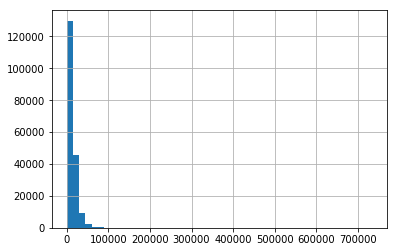

In [24]:
df.precio_metrocuadrado.hist(bins = 50 )

In [25]:
conProvincia = ['id','titulo','descripcion','direccion','ciudad','idzona','lat','lng','fecha']

In [33]:
X = df.drop(['precio'] + conProvincia,axis = 1)
y = df['precio']

In [34]:
X = pd.get_dummies(X, dummy_na=False)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [36]:
parametros = {'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'n_estimators': 100,
 'nthread': 4,
 'random_state': 0,
 'subsample': 1}

In [37]:
model = XGBRegressor(**parametros)

In [38]:
%%time
model.fit(X_train,y_train)

/home/braianvillalba/.local/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:30:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
CPU times: user 1min 27s, sys: 2.25 s, total: 1min 29s
Wall time: 22.6 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [40]:
pred = model.predict(X_test)

In [41]:
RMSLE(y_test,pred)

/home/braianvillalba/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


0.19707082609374754

In [44]:
print(model.feature_importances_)

[0.00595047 0.00818126 0.00937038 0.0427385  0.09548046 0.0593421
 0.01313042 0.00164197 0.00757867 0.00273812 0.0048276  0.01523375
 0.00221839 0.00285334 0.00339736 0.14735615 0.04287376 0.01141794
 0.0138184  0.00786833 0.00300146 0.00458368 0.         0.00482265
 0.00066584 0.         0.00742348 0.00775389 0.00492224 0.00421245
 0.         0.01472519 0.00541375 0.00580928 0.00772099 0.02423621
 0.03700418 0.01588247 0.01015023 0.00508413 0.00673162 0.00393806
 0.0008531  0.0030825  0.0030716  0.01407659 0.02161231 0.00283732
 0.05729339 0.01381725 0.02677244 0.00432429 0.00343781 0.00360239
 0.01442992 0.00349471 0.01141229 0.01034497 0.02670281 0.00547331
 0.00892301 0.00991261 0.00204174 0.02108119 0.00266416 0.00963158
 0.00136493 0.00717251 0.0043709  0.00315348 0.02825935 0.00268635]


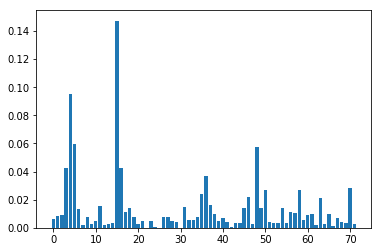

In [46]:
from matplotlib import pyplot
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()